In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import heatmap

In [5]:
def CountSketch(nrows, ncols):
    S = np.zeros([nrows, ncols])
    hashed_row_idx = np.random.choice(ncols, nrows, replace=True)
    signs = np.ravel(2*np.random.randint(low=0, high=2, size=(1,ncols)) - 1)
    #print(signs.shape)
    print(hashed_row_idx.shape)
    print(hashed_row_idx)
    for col in range(ncols):
        row = hashed_row_idx[col]
        #print("(row, col, value) : ({},{},{})".format(row, col, signs[col]))
        
        S[row, col] = signs[col]
    return S

In [6]:
S = CountSketch(15, 5)

(15,)
[3 0 4 0 4 4 0 2 3 2 4 0 1 3 4]


In [7]:
S

array([[ 0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

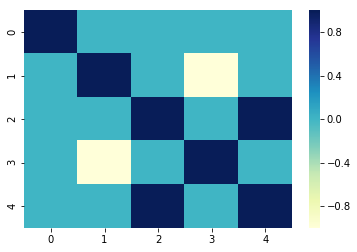

In [8]:
heatmap(np.dot(S.T, S), cmap="YlGnBu")

In [9]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse import diags

In [10]:
def sparse_embedding(nrows, ncols):
    '''
    Input: (nrows, ncols) is the dimensionality of the matrix.
    n is the number of basis functions to expand into.
    Output: csc sparse matrix which is a CountSketch
    COMMENTS: MAY WANT TO PREMULTIPLY S BY A DIAGONAL GAUSSIAN TO REDUCE
    THE ROW/COLUMN DEPENDENCY ON DIMENSION.
    
    See discussion below Theorem 2.5 in the following:
    http://researcher.watson.ibm.com/researcher/files/us-dpwoodru/journal.pdf
    
    Note that this is the wrong way around for our purpose so compute as above 
    but will need to transpose it, hence usage will be (num_feats, expanded_feats)
    
    n.b this is the construction for rows < cols and left multiplication.
    If right multiplication needed then do this construction then transpose.
    
    '''
    r, n = nrows, ncols
    row = np.random.randint(low=0,high=r,size=(n,1)).flatten() # sample rows for each col uar
    #print(row)
    col = np.arange(n)
    hash_vals = 2*np.random.randint(low=0,high=2,size=(n,1)).flatten() - np.ones_like(row)  # generate rademacher rvs
    S = csc_matrix((hash_vals, (row, col)), shape=(r, n))
    #print(S.shape)
    #print("CS matrix {}".format(S))
    #scale_gaussian = r**(-0.5)*diags([np.random.randn(r)], [0]) # digaonal sparse matrix of normals rvs
    #print("scaler: {}".format(scale_gaussian))
    #print(scale_gaussian.shape)
    #projection = scale_gaussian.dot(S)
    #print(projection.shape)
    #print(projection.toarray())
    return S.toarray()

In [11]:
S=sparse_embedding(10,20)

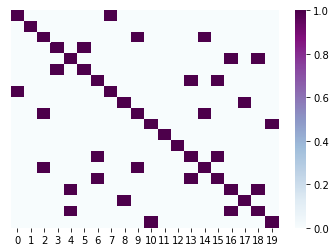

In [12]:
heatmap(np.abs(np.dot(S.T, S)),yticklabels=False, cmap="BuPu",)

In [178]:
cs_gram = S.dot(S.T)
print(cs_gram)

[[2 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [179]:
np.sum(S**2, axis=1)

array([2, 3, 1, 2, 4, 0, 2, 2, 3, 1])

In [153]:
eigs,_ = np.linalg.eig(cs_gram)

In [154]:
eigs.shape

(750,)

In [158]:
np.flip(np.sort(eigs), axis=0)

array([ 8.,  6.,  6.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

In [165]:
U, Sig, V = np.linalg.svd(S,full_matrices=False )

In [167]:
U.shape
Sig.shape

(750,)

In [163]:
S=np.random.randn(750,1000)/750**0.5

In [164]:
gaussian_gram = S.dot(S.T)
eigs_gauss,_ = np.linalg.eig(gaussian_gram)
np.flip(np.sort(eigs_gauss), axis=0)

array([ 4.65645151,  4.57010403,  4.50145275,  4.45149751,  4.40632541,
        4.3896626 ,  4.34488667,  4.29418806,  4.27912378,  4.24656246,
        4.21289219,  4.18959466,  4.17564273,  4.1691972 ,  4.12602623,
        4.08249977,  4.04709889,  4.0319521 ,  4.02296598,  3.99854406,
        3.96980905,  3.95607073,  3.93471971,  3.90448312,  3.89442573,
        3.88303462,  3.87309574,  3.86607107,  3.84586316,  3.81732758,
        3.79787029,  3.7673439 ,  3.74892716,  3.73968302,  3.73164202,
        3.72221166,  3.7011017 ,  3.68053571,  3.66848024,  3.62471966,
        3.60983718,  3.59957049,  3.59405314,  3.58110821,  3.55908076,
        3.55519535,  3.54079432,  3.50630565,  3.48607475,  3.48156374,
        3.47190415,  3.45126334,  3.43245026,  3.41577821,  3.41204235,
        3.39319475,  3.37266858,  3.35457801,  3.3391373 ,  3.32961227,
        3.32449486,  3.31087207,  3.29892881,  3.27783348,  3.26903017,
        3.25763546,  3.2507131 ,  3.22560395,  3.20897993,  3.18

## Operator Norm

Can we bound $ \| E( S^T (SS^T)^{-1}) S\|$

In [291]:
rows, cols = 10, 20
S = sparse_embedding(rows, cols)

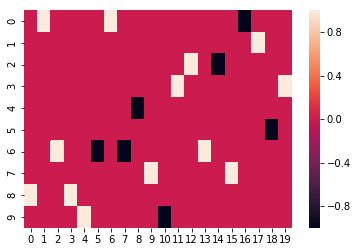

In [292]:
heatmap(S)

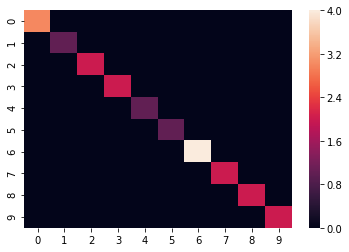

In [293]:
heatmap(S@S.T)

In [294]:
np.max(S@S.T)

4

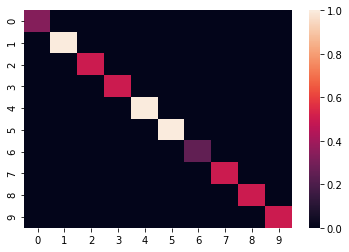

In [295]:
heatmap(np.linalg.inv(S@S.T))

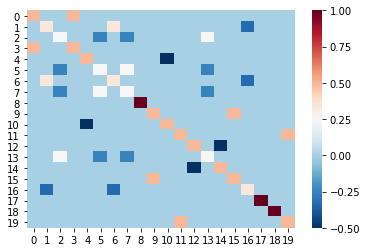

In [296]:
mat = S.T@np.linalg.inv(S@S.T)@S
heatmap(mat, cmap="RdBu_r")

In [297]:
np.max(np.max(mat))

1.0

In [298]:
diag_sum = np.sum(np.diag(mat))
diag_sum

10.0

In [300]:
np.allclose(rows, diag_sum)

True

In [301]:
bound = np.linalg.norm(mat, ord=2)
bound

1.0000000000000002

In [302]:
np.allclose(bound,1)

True

In [303]:
np.linalg.eigvals(mat)

array([  1.00000000e+00 +0.00000000e+00j,
         1.11022302e-16 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
         5.16402625e-18 +0.00000000e+00j,
         1.55994275e-17 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
         1.46367293e-18 +0.00000000e+00j,
        -6.77639019e-18 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
        -4.07931758e-18 +1.78659088e-17j,
        -4.07931758e-18 -1.78659088e-17j,
         1.00000000e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,   1.00000000e+00 +0.00000000e+00j])

## Matrix Sampling 

In [139]:
X = np.random.randn(10,4)
X

array([[ 1.49803637, -1.88345046,  0.07230322,  0.35670718],
       [-0.35368721, -0.99355727,  0.36440272, -0.16926737],
       [-1.22966239,  0.30417392, -0.35099064,  0.61052589],
       [ 1.13000941, -0.11484788,  0.01515831,  1.7963996 ],
       [ 1.61067429,  1.45465992,  1.59148724,  1.18423373],
       [-0.49860607,  0.49223764, -0.58101531,  0.21789099],
       [ 1.27658761, -0.8429259 , -0.28815266, -0.3001125 ],
       [-0.21423992,  1.35645981, -0.68062879,  1.01896631],
       [-0.28930711, -0.79436802, -0.63595051, -0.71738102],
       [-0.40033279,  0.53946185,  0.16648027,  2.3156857 ]])

In [304]:
u = np.zeros((10,1))
u[4,0] = 1
u

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [307]:
u.T@X

array([[ 1.61067429,  1.45465992,  1.59148724,  1.18423373]])

In [235]:
S = np.zeros((5,10))
positions = np.random.choice(5, 15)
#row_num = 0
#for idx in positions:
#    S[row_num, idx] = 1
#    row_num += 1
#S
positions

array([2, 3, 2, 0, 3, 0, 2, 2, 0, 3, 1, 0, 1, 3, 0])

In [181]:
R = np.zeros(shape=(10,10))
rademacher = 2*np.random.randint(low=0, high=2,size = (1,10)) - 1
rademacher
np.fill_diagonal(R, rademacher)


In [182]:
print(R)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]


In [183]:
S@R

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])

In [316]:
## Gaussian
G = np.random.randn(500,2500)/np.sqrt(500)


In [317]:
proj = G.T@(np.linalg.inv(G@G.T))@G

In [318]:
np.linalg.norm(proj,ord=2)

1.0000000000000016

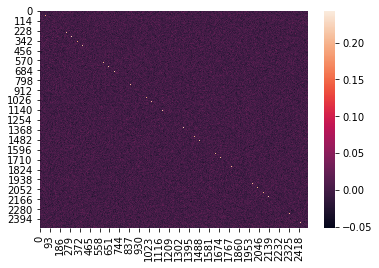

In [319]:
heatmap(proj)

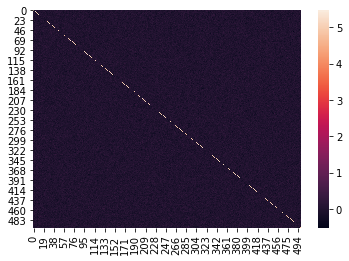

In [320]:
heatmap(G@G.T)